In [1]:
# 导入相关模块
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision.transforms as T
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# 给图像添加噪声
def add_noise(img):
    noise = torch.randn(img.size()) * 0.3
    noisy_img = img + noise
    return noisy_img

# 加载MNIST数据集
dataset = MNIST('../dataset', train=True, transform=T.ToTensor(), download=True)
# MNIST数据导入
# 批次大小
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [2]:
# 基于自编码器的去噪模型
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # 编码器结构
        self.encoder = nn.Sequential(
                        nn.Linear(28*28, 256),
                        nn.ReLU(True),
                        nn.Linear(256, 64),
                        nn.ReLU(True)  
                        )
        # 解码器结构
        self.decoder = nn.Sequential(
                        nn.Linear(64, 256),
                        nn.ReLU(True),
                        nn.Linear(256, 28*28),
                        nn.Sigmoid(),
                        )
    # 前向计算流程
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

epoch [1/30], loss:0.1172


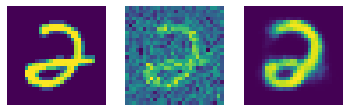

epoch [2/30], loss:0.0969


In [ ]:
# 训练轮数
num_epochs = 30
# 学习率
learning_rate = 1e-3
# 模型实例
model = AutoEncoder().cuda()
# 损失函数
criterion = nn.BCELoss()
# 定义优化器
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# 执行训练
for epoch in range(num_epochs):
    for img, _ in data_loader:
        img = img.view(img.size(0), -1)
        # 给图像添加噪声
        noisy_img = add_noise(img)
        img = img.cuda()
        noisy_img = noisy_img.cuda()
        output = model(noisy_img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # 打印当前训练信息
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    
    if epoch % 10 == 0:
        input_img = img.view((img.size(0), 1, 28, 28)).cpu().data
        output_img = output.view((output.size(0), 1, 28, 28)).cpu().data
        noisy_img = noisy_img.view((noisy_img.size(0), 1, 28, 28)).cpu().data
        plt.figure()
        plt.subplot(1,3,1)
        plt.imshow(input_img[0].numpy().transpose(1,2,0).squeeze(2))
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1,3,2)
        plt.imshow(noisy_img[0].numpy().transpose(1,2,0).squeeze(2))
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        
        plt.subplot(1,3,3)
        plt.imshow(output_img[0].numpy().transpose(1,2,0).squeeze(2))
        plt.axis('off')
        plt.xticks([])
        plt.yticks([])
        plt.show();